---
Titanic - Machine Learning from Disaster
---
---

The Titanic dataset (hosted by Kaggle https://www.kaggle.com/competitions/titanic/data) is the classic starting point for a beginner wanting to explore the world of Machine Learning.

The premise of the challenge is that we have the passenger list for the voyage and it's been split into two sets of data;  "train_data" lets us know whether each passenger survived, while "test_data" is missing this information and so we're asked to build a model that can learn from the training data and then make a prediction on the test data.

Let's get started by using the Pandas module to load the data to an object called "train_data" and take a look inside.

The data in this case is stored on GitHub, and you can view the data here: https://github.com/martinashworth/data/blob/main/titanic/train.csv

The above link leads to a table on a web page and, whilst it is possible to use this as our datasource, it adds a layer of complexity that would be a distraction at this stage, so we're going to access the same data in its raw csv format, as indicated by the prefix in the "url" link below:


In [12]:
import pandas as pd

# Load the data from a remote location and store in an object called "train_data"
url = "https://raw.githubusercontent.com/martinashworth/data/main/titanic/train.csv"
train_data = pd.read_csv(url)

# Display the first few rows of the data
display(train_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---
Great.  Now we have our data and a rough idea of the type of information that it contains;  we can see the names of the various columns in bold across the top, and then a few rows of data to show what sort of values they hold.

We stored the data in an object called "train_data" and so we can ask Pandas to use the ".info()" method to give us more information about it.


In [13]:
# display info for the dataframe
display(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

---
We can see that we have 891 rows of data over 12 columns.

The names of the columns are listed, and we can also see that we have different counts for the number of rows that are "non-null", some of which are less than the number of rows;  in other words, some of our data is missing.  

We can also see the "Dtype" which indicates the type of data held in each column, including integers, objects and floats.

OK.  Let's find out how much of the data is missing.  

We'll ask Pandas for the number of nulls rows for each column, then show this value as a percentage of the total number of rows, to give us a better idea of the scope of the problem.

In [14]:
# Get the number of missing values in each column of the training data
display(train_data.isnull().sum() / len(train_data) * 100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

---
Right.  About 19% of the rows don't have any "Age" data, and roughly 77% is missing for "Cabin", but we do have the bulk of the "Embarked" data.

Given the "women and children first" philosophy, it's fair to think that Age is an important field.  

It's possible that "Cabin" was a factor in survival rates, but we might reasonably see some correlation between this and the Pclass and Fare fields so it's not obvious how field would add value to our model.

As for "Embarked" it's diffifult to imagine that we can learn much about survival rates from the location where the passenger boarded the ship, so this is probably not worth worrying about.

For the sake of argument, let's get rid of the "Cabin" and "Embarked" fields, and fill the missing "Age" values with the median for the column as a whole.

In [15]:
# Calculate the median age
median_age = train_data['Age'].median()

# Replace missing values in the Age column with the median age
train_data['Age'].fillna(median_age, inplace=True)

# Drop the Cabin and Embarked columns
train_data.drop('Cabin', axis=1, inplace=True)
train_data.drop('Embarked', axis=1, inplace=True)

# Review the results
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


---
# - Feature Engineering
- do this later after a first run to see if it offers any improvement on the model

In [16]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1


In [17]:
import re

def extract_title(name):
    match = re.search(r'\b(\w+)\.', name)
    if match:
        return match.group(1)
    else:
        return ''

train_data['Title'] = train_data['Name'].apply(extract_title)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,Mr


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical variables
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Title'] = label_encoder.fit_transform(train_data['Title'])

# Split the data into training and testing sets
X = train_data.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Title
0,1,3,1,22.0,1,0,7.2500,2,12
1,2,1,0,38.0,1,0,71.2833,2,13
2,3,3,0,26.0,0,0,7.9250,1,9
3,4,1,0,35.0,1,0,53.1000,2,13
4,5,3,1,35.0,0,0,8.0500,1,12


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the model using liblinear
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.776536312849162


In [20]:
# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': model.coef_[0]})

# Print the DataFrame sorted by coefficient value
print(coef_df.sort_values(by='coefficient', ascending=False))

       feature  coefficient
7   FamilySize     0.911561
6         Fare     0.004019
0  PassengerId     0.000167
3          Age    -0.029783
8        Title    -0.036351
1       Pclass    -0.774610
5        Parch    -0.952550
4        SibSp    -1.256479
2          Sex    -2.440941


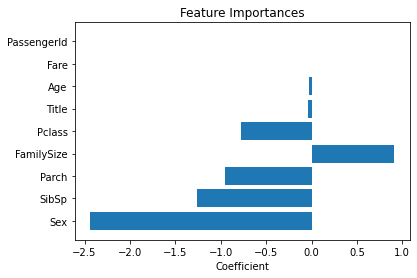

In [21]:
import matplotlib.pyplot as plt

# Get the coefficients and feature names
coefs = model.coef_[0]
features = X_train.columns

# Create a dictionary of feature names and their corresponding coefficients
coef_dict = dict(zip(features, coefs))

# Sort the dictionary by absolute coefficient value
coef_dict = dict(sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True))

# Create a bar chart of feature importances
plt.barh(range(len(coef_dict)), list(coef_dict.values()), align='center')
plt.yticks(range(len(coef_dict)), list(coef_dict.keys()))
plt.xlabel('Coefficient')
plt.title('Feature Importances')    
plt.show()


---
### run the model on the test data, generate predictions and put the results in a format for submission to Kaggle, then get a final score.